**This notebook is a copy of the full one without the code so that student wanting to work on their programming skills can train here, using the main notebook as a correction.**

Sentiment Analysis (SA) is the broad field that aim at quantifying natural language emanating from human. This task has become more and more interesting as CPU power and cost diminished and has artificial intelligence (AI) rose.

Basic sentiment analysis aimed at quantifying what proportion of word are "positive" and what proportion of word are "negative" in a text. Before the introduction of Large Language Models, and even before the introduction of the first efficient deep learning systems for natural language processing (NLP), the main way to do SA was to create a dictionary with each word and its weight of negativity and positivity.

Before [Loughran and McDonald (LM) work](https://sci-hub.live/https://doi.org/10.1111/j.1540-6261.2010.01625.x), SA for Financial Statements was done with the Harvard Psychology dictionnary. Nonetheless, in this dictionary, words like "tax" and "liabilities" were highly negative in the common life whereas they are just technical words in finance.

To allow better SA for financial statements, LM created their own dictionary of words and divided the sentiment between 7 different categories (positivity, negativity, uncertainty, weak modals, strong modals...), also allowing some words to not have any conotation (Abacus is just a financial product, not positive, not negative).

In this notebook we propose to help you build your own Loughran McDonald sentiment analyser with python.

This notebook aim at introducing sentiment analysis and coding to beginners and lack a lot of optimisation and advanced elements (API, further regular expression, dataframes etc.). Feel free to create a more advanced one for more advanced students in programming.


# Loughran McDonald SEC Sentiment Analysis gap-fill

## Load Loughran McDonald dictionary and set up

In this part, we will need to download the [Loughran-McDonald_MasterDictionary_1993-2021.csv](https://github.com/Phaoll/sentiment_analysis_with_loughran_mcdonald/blob/main/Loughran-McDonald_MasterDictionary_1993-2021.csv) (you can download everything [here](https://github.com/Phaoll/sentiment_analysis_with_loughran_mcdonald/archive/refs/heads/main.zip) and put it in the same folder on our drive than this Google Colaboratory file.

Then, write down the path to this folder (eache nested folder should be separated with a `/`).

In [64]:
## CODE NOTE: don't learn these lines, just copy paste them from one Notebook to another
## No one knows the google.colab library perfectly but the ones who coded it

# Connect to your Google Drive so that this Google Colaboratory has access to your documents
PATH_TO_THIS_GOOGLE_COLLABORATORY = '/content/drive/My Drive/EDHEC'

# Allow Google to access your drive
from google.colab import drive
drive.mount('/content/drive')

# Tell this Google Colaboratory that we will work in the indicated folder and no other
import os
os.makedirs(PATH_TO_THIS_GOOGLE_COLLABORATORY, exist_ok=True) # Ensure the directory exists

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
## CODE NOTE: Here we want to extract the table from the CSV
## The path to the CSV is the PATH_TO_THIS_GOOGLE_COLLABORATORY + "/Loughran-McDonald_MasterDictionary_1993-2021.csv"
## I recommend that you read the csv.DictReader documentation:
## https://docs.python.org/3/library/csv.html#csv.DictReader:~:text=class%20csv.DictReader(f%2C%20fieldnames%3DNone%2C%20restkey%3DNone%2C%20restval%3DNone%2C%20dialect%3D%27excel%27%2C%20*args%2C%20**kwds)

import csv

# List the seven sentiments of LM
SENTIMENTS = ["Negative", "Positive", "Uncertainty", "Litigious", "Strong_Modal", "Weak_Modal", "Constraining"]

# Empty dictionary to contain each row of LM csv
WORDS_DICTIONARY = {}

# We open the file and for each row we create an entry in the dictionary

#
# UP TO YOU ;)
#

In [66]:
# Let show the first 10 entries of the dictionary to control that we have the right thing
# Consider 'enumerate' rather than using 'range' ;)

#
# UP TO YOU ;)
#

# Expected output:
# >>> Master dictionary has 86531 words.
# >>> AARDVARK {'Word': 'AARDVARK', 'Seq_num': '1', 'Word Count': '354', 'Word Proportion': '1.5500800963911755e-08', 'Average Proportion': '1.4225999551502054e-08', 'Std Dev': '3.815485513159406e-06', 'Doc Count': '99', 'Negative': '0', 'Positive': '0', 'Uncertainty': '0', 'Litigious': '0', 'Strong_Modal': '0', 'Weak_Modal': '0', 'Constraining': '0', 'Syllables': '2', 'Source': '12of12inf'}
# >>> AARDVARKS {'Word': 'AARDVARKS', 'Seq_num': '2', 'Word Count': '3', 'Word Proportion': '1.3136272003315047e-10', 'Average Proportion': '8.653817188771135e-12', 'Std Dev': '9.241713594106557e-09', 'Doc Count': '1', 'Negative': '0', 'Positive': '0', 'Uncertainty': '0', 'Litigious': '0', 'Strong_Modal': '0', 'Weak_Modal': '0', 'Constraining': '0', 'Syllables': '2', 'Source': '12of12inf'}
# >>> ABACI {'Word': 'ABACI', 'Seq_num': '3', 'Word Count': '9', 'Word Proportion': '3.940881600994514e-10', 'Average Proportion': '1.1696785858863093e-10', 'Std Dev': '5.2904646914222574e-08', 'Doc Count': '7', 'Negative': '0', 'Positive': '0', 'Uncertainty': '0', 'Litigious': '0', 'Strong_Modal': '0', 'Weak_Modal': '0', 'Constraining': '0', 'Syllables': '3', 'Source': '12of12inf'}
# >>> ABACK {'Word': 'ABACK', 'Seq_num': '4', 'Word Count': '29', 'Word Proportion': '1.2698396269871212e-09', 'Average Proportion': '6.654734849591407e-10', 'Std Dev': '1.5951002879713016e-07', 'Doc Count': '28', 'Negative': '0', 'Positive': '0', 'Uncertainty': '0', 'Litigious': '0', 'Strong_Modal': '0', 'Weak_Modal': '0', 'Constraining': '0', 'Syllables': '2', 'Source': '12of12inf'}
# >>> ABACUS {'Word': 'ABACUS', 'Seq_num': '5', 'Word Count': '8570', 'Word Proportion': '3.752595035613665e-07', 'Average Proportion': '3.8094635635836227e-07', 'Std Dev': '3.529355594761714e-05', 'Doc Count': '1108', 'Negative': '0', 'Positive': '0', 'Uncertainty': '0', 'Litigious': '0', 'Strong_Modal': '0', 'Weak_Modal': '0', 'Constraining': '0', 'Syllables': '3', 'Source': '12of12inf'}
# >>> ABACUSES {'Word': 'ABACUSES', 'Seq_num': '6', 'Word Count': '0', 'Word Proportion': '0.0', 'Average Proportion': '0.0', 'Std Dev': '0.0', 'Doc Count': '0', 'Negative': '0', 'Positive': '0', 'Uncertainty': '0', 'Litigious': '0', 'Strong_Modal': '0', 'Weak_Modal': '0', 'Constraining': '0', 'Syllables': '4', 'Source': '12of12inf'}
# >>> ABAFT {'Word': 'ABAFT', 'Seq_num': '7', 'Word Count': '4', 'Word Proportion': '1.7515029337753396e-10', 'Average Proportion': '2.3027981500146138e-11', 'Std Dev': '2.4592385652759045e-08', 'Doc Count': '1', 'Negative': '0', 'Positive': '0', 'Uncertainty': '0', 'Litigious': '0', 'Strong_Modal': '0', 'Weak_Modal': '0', 'Constraining': '0', 'Syllables': '2', 'Source': '12of12inf'}
# >>> ABALONE {'Word': 'ABALONE', 'Seq_num': '8', 'Word Count': '142', 'Word Proportion': '6.217835414902456e-09', 'Average Proportion': '4.967966513956233e-09', 'Std Dev': '1.067561063379617e-06', 'Doc Count': '48', 'Negative': '0', 'Positive': '0', 'Uncertainty': '0', 'Litigious': '0', 'Strong_Modal': '0', 'Weak_Modal': '0', 'Constraining': '0', 'Syllables': '4', 'Source': '12of12inf'}
# >>> ABALONES {'Word': 'ABALONES', 'Seq_num': '9', 'Word Count': '1', 'Word Proportion': '4.378757334438349e-11', 'Average Proportion': '8.283601139300324e-11', 'Std Dev': '8.846346945780505e-08', 'Doc Count': '1', 'Negative': '0', 'Positive': '0', 'Uncertainty': '0', 'Litigious': '0', 'Strong_Modal': '0', 'Weak_Modal': '0', 'Constraining': '0', 'Syllables': '4', 'Source': '12of12inf'}
# >>> ABANDON {'Word': 'ABANDON', 'Seq_num': '10', 'Word Count': '127090', 'Word Proportion': '5.564962696337698e-06', 'Average Proportion': '4.698651522249059e-06', 'Std Dev': '3.314939636776057e-05', 'Doc Count': '66312', 'Negative': '2009', 'Positive': '0', 'Uncertainty': '0', 'Litigious': '0', 'Strong_Modal': '0', 'Weak_Modal': '0', 'Constraining': '0', 'Syllables': '3', 'Source': '12of12inf'}

Master dictionary has 86531 words.
AARDVARK {'Word': 'AARDVARK', 'Seq_num': '1', 'Word Count': '354', 'Word Proportion': '1.5500800963911755e-08', 'Average Proportion': '1.4225999551502054e-08', 'Std Dev': '3.815485513159406e-06', 'Doc Count': '99', 'Negative': '0', 'Positive': '0', 'Uncertainty': '0', 'Litigious': '0', 'Strong_Modal': '0', 'Weak_Modal': '0', 'Constraining': '0', 'Syllables': '2', 'Source': '12of12inf'}
AARDVARKS {'Word': 'AARDVARKS', 'Seq_num': '2', 'Word Count': '3', 'Word Proportion': '1.3136272003315047e-10', 'Average Proportion': '8.653817188771135e-12', 'Std Dev': '9.241713594106557e-09', 'Doc Count': '1', 'Negative': '0', 'Positive': '0', 'Uncertainty': '0', 'Litigious': '0', 'Strong_Modal': '0', 'Weak_Modal': '0', 'Constraining': '0', 'Syllables': '2', 'Source': '12of12inf'}
ABACI {'Word': 'ABACI', 'Seq_num': '3', 'Word Count': '9', 'Word Proportion': '3.940881600994514e-10', 'Average Proportion': '1.1696785858863093e-10', 'Std Dev': '5.2904646914222574e-08', '

Congratulations ! You successfully loaded the Loughran McDonald dictionary. You should see that there are 86531 words starting with `AARDVARK`. The first word with a weight is `ABANDON` with `2009`in the `Negativity` field. Indeed 'abandon', in case of financial statement, is rather negative.

Loughran-McDonal dictionary is based on 50 000 SEC 10-K reports from 1993 to 2008. It contains every word that appeared at least in 5% of these reports.

## Load and refine SEC reports for Apple

There are plenty way of connecting to the SEC EDGAR API. In our case we will be simple and copy/paste manually the reports we want in a folder `reports` in our working directory.

For this example, you can load the 11 reports of Microsoft from 2010 to 2020 [here](https://github.com/Phaoll/sentiment_analysis_with_loughran_mcdonald/tree/main/reports). Please set them in a folder `reports` in your working directory.

If you want to analyze another company:
- Go to [SEC EDGAR manual interface](https://www.sec.gov/edgar/searchedgar/companysearch)
- Search a company
- On the right pannel, click on `10-K (annual reports) and 10-Q (quarterly reports)` to open it
- Click on `View all 10-Ks and 10-Qs`
- In the `Fillings` section, expand the date up to the moment you want to analyze
- You can open each `Annual report [Section 13 and 15(d), not S-K Item 405]`
- Select everything (`cntrl + A` 😉), copy and paste it in a `<year of the 10k>.txt` file with the year instead of the `<year of the 10k>`
- Put the file in the folder `reports` (and don't forget to remove the files from other companies)

In [67]:
STARTING_YEAR = 2010 # Year of the first 10K report
ENDING_YEAR = 2020 # Year of the last report

list_of_reports = []

## CODE NOTE: Lets load every report in our list of report
## Here it is a classical for loop over the years, open the file with `open` and read it with `.read()`
## Use open with parameter `encoding="cp1250"` to allow .txt coming from word

#
# UP TO YOU ;)
#

In [68]:
import re

## CODE NOTE: Here is a simple control cell, I'll give you the expected output if you use Microsoft 10Ks from 2010 to 2020
## Look into the re library and especially `re.findall` and the `\w+` regular expression
## UP TO YOU to fill the code in each print



print("Total number of characters:") # >>> Total number of characters: 3956717
print("Characters per report:") # >>> Characters per report: [314099, 322957, 331953, 335546, 360706, 360290, 367652, 390058, 401906, 383406, 388144]
print("Total number of words:") # >>> Total number of words: 556552
print("Words per report:") # >>> Words per report: [45415, 46225, 47970, 48719, 52437, 52162, 53520, 52831, 54023, 51315, 51935]
print("-----------------------")
print(f"Extract of first report (year {STARTING_YEAR}):\n") 
# >>> Extract of first report (year 2010):
# >>>  10-K 1 d10k.htm ANNUAL REPORT ON FORM 10-K
# >>> Table of Contents
# >>> UNITED STATES
# >>> 
# >>> SECURITIES AND EXCHANGE COMMISSION


Total number of characters: 3956717
Characters per report: [314099, 322957, 331953, 335546, 360706, 360290, 367652, 390058, 401906, 383406, 388144]
Total number of words: 556552
Words per report: [45415, 46225, 47970, 48719, 52437, 52162, 53520, 52831, 54023, 51315, 51935]
-----------------------
Extract of first report (year 2010):
 10-K 1 d10k.htm ANNUAL REPORT ON FORM 10-K
Table of Contents
UNITED STATES

SECURITIES AND EXCHANGE COMMISSION

Washington, D.C. 20549

 

FORM 10-K

 

 

x	
ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934

For the Fiscal Year Ended June 30, 2010



## Analyse the reports

We create a dataframe (a table) that will contain the information for each report.

In [69]:
import pandas as pd

## CODE NOTE: here we create and empty pandas DataFrame
## A pandas DataFrame can be compared to an excel table
## To create it we will simply provide the column names as a list of string
## https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#:~:text=no%20index%20provided.-,columns,-Index%20or%20array

df_columns = [
    # We will use the Year as an identifier (also called Primary Key)
    # We will count the number of words
    # For each sentiment, we will have a column for the absolute number of words linked to it and for the proportion
]

compilation_df = pd.DataFrame(columns=df_columns)
compilation_df.head()

,Year,Number_of_words,Negative_absolute,Negative_proportion,Positive_absolute,Positive_proportion,Uncertainty_absolute,Uncertainty_proportion,Litigious_absolute,Litigious_proportion,Strong_Modal_absolute,Strong_Modal_proportion,Weak_Modal_absolute,Weak_Modal_proportion,Constraining_absolute,Constraining_proportion


For each word of each report we will check if it belongs to the LM dictionary. If it does we will both count that this word appear once but also that this sentiment appear once.

Then we will divide it by the number of words to get the proportion of words of each type in order to not be influenced by the report size.

We use the `re` library to extract all the words of the document.

In [70]:
## CODE NOTE: Here is the big algorithmic part ! We'll go trough it with pseudo-code

## For each report of the report list
    ## We retrieve the words with `findall` and `\w+`
    ## We put them in uppercases in a list thanks to `.upper()` 

    ## We create an empty dictionary that will be used to add a line to the dataframe, hence it shall have the column names as keys, it is called output_dict bellow
    ## We create an empty dictionary that will count the occurence of words for each sentiment

    ## For each word of the word list found before
        ## If the word belongs to Loughran McDonald dictionary
            ## Then for each sentiment possible
                ## If the sentiment is not 0 in the LM dictionary
                    ## Then add 1 to the dictionary that count sentiment occurence

    ## Finaly we fill the dictionary that will be appended to the main dataframe

    ## I give you the concatenation of the dictionary with the DataFrame as it is a bit tricky
    temp_df = pd.DataFrame([output_dict])
    compilation_df = pd.concat([compilation_df, temp_df], ignore_index=True)


In [71]:
# Check that the dataframe filled correctly with `.head()`
# Note that you have to launch the cell 2 cells above to empty the dataframe again

#
# UP TO YOU ;)
#

,Year,Number_of_words,Negative_absolute,Negative_proportion,Positive_absolute,Positive_proportion,Uncertainty_absolute,Uncertainty_proportion,Litigious_absolute,Litigious_proportion,Strong_Modal_absolute,Strong_Modal_proportion,Weak_Modal_absolute,Weak_Modal_proportion,Constraining_absolute,Constraining_proportion
0,2010,45415,563,0.012397,331,0.007288,512,0.011274,373,0.008213,89,0.001960,214,0.004712,209,0.004602
1,2011,46225,544,0.011769,356,0.007701,556,0.012028,391,0.008459,98,0.002120,244,0.005279,197,0.004262
2,2012,47970,648,0.013508,352,0.007338,598,0.012466,397,0.008276,90,0.001876,273,0.005691,262,0.005462
3,2013,48719,686,0.014081,347,0.007122,581,0.011926,408,0.008375,88,0.001806,271,0.005563,268,0.005501
4,2014,52437,730,0.013921,362,0.006904,600,0.011442,456,0.008696,83,0.001583,286,0.005454,246,0.004691
5,2015,52162,816,0.015644,366,0.007017,598,0.011464,452,0.008665,74,0.001419,276,0.005291,269,0.005157
6,2016,53520,867,0.016200,396,0.007399,640,0.011958,421,0.007866,93,0.001738,289,0.005400,305,0.005699
7,2017,52831,821,0.015540,416,0.007874,624,0.011811,428,0.008101,88,0.001666,297,0.005622,291,0.005508
8,2018,54023,817,0.015123,415,0.007682,624,0.011551,476,0.008811,76,0.001407,349,0.006460,302,0.005590
9,2019,51315,768,0.014966,413,0.008048,634,0.012355,443,0.008633,58,0.001130,361,0.007035,279,0.005437


## Vizualize

Finally we can vizualize the result to see the variation of the number of word in each sentiment and their proportion in the report year after year.

<Axes: xlabel='Year'>

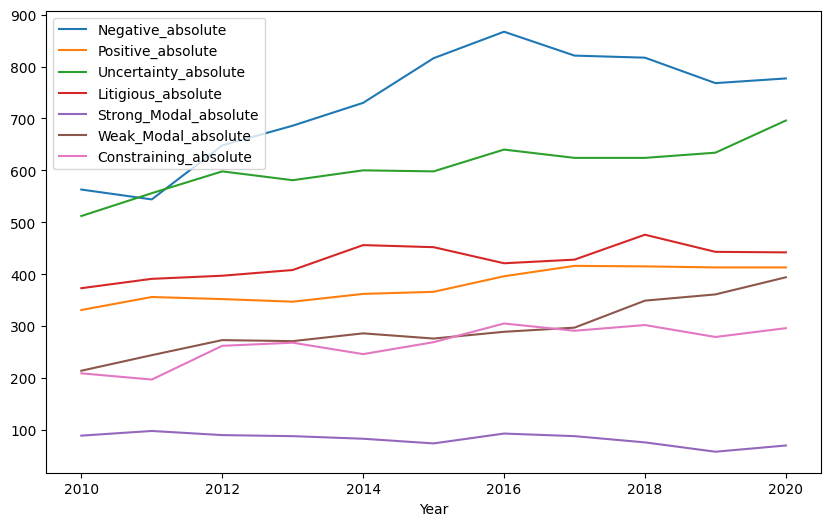

In [72]:
compilation_df[['Year', 'Negative_absolute', 'Positive_absolute', 'Uncertainty_absolute', 'Litigious_absolute', 'Strong_Modal_absolute', 'Weak_Modal_absolute', 'Constraining_absolute']].plot(x = 'Year', figsize=(10,6))

<Axes: xlabel='Year'>

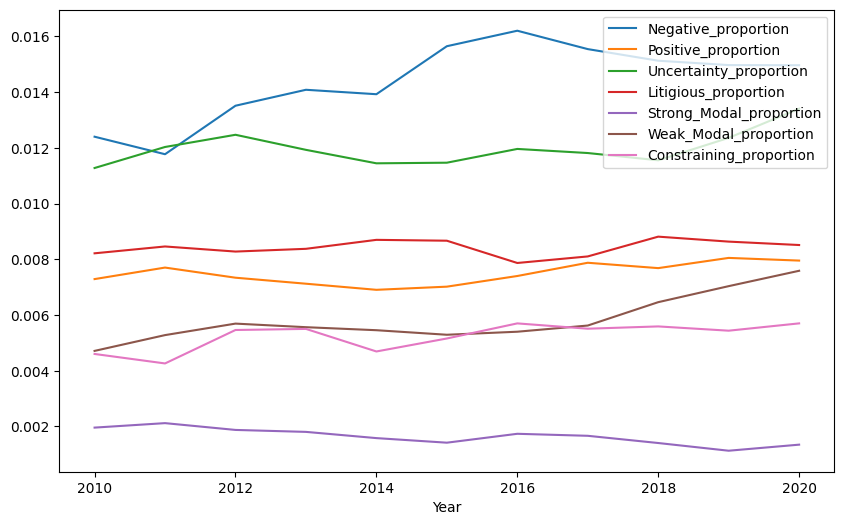

In [73]:
## CODE NOTE: Based on the previous cell, make a simple visualization for the proportion of each sentiment (not absolute number)

#
# UP TO YOU ;)
#

What your folder should look like at the end:

My Drive/WorkingFolder:

├── `<copy_of_this_google_collab>`.ipynb

├── Loughran-McDonald_MasterDictionary_1993-2021.csv


├── reports

│..........├── 2010.txt

│..........├── 2011.txt

│..........├── 2012.txt

│..........├── 2013.txt

│..........├── 2014.txt

│..........├── 2015.txt

│..........├── 2016.txt

│..........├── 2017.txt

│..........├── 2018.txt

│..........├── 2019.txt

│..........└── 2020.txt